# Data Preprocessing & Models Building

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float', '{:.4f}'.format)

In [2]:
data = pd.read_csv('data/clean_data.csv')
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_2,tenure_3,tenure_4,tenure_5
0,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,29.8500,29.8500,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,56.9500,1889.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000
2,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,53.8500,108.1500,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
3,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,42.3000,1840.7500,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,70.7000,151.6500,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7021 non-null   float64
 1   SeniorCitizen                          7021 non-null   float64
 2   Partner                                7021 non-null   float64
 3   Dependents                             7021 non-null   float64
 4   PhoneService                           7021 non-null   float64
 5   OnlineSecurity                         7021 non-null   float64
 6   OnlineBackup                           7021 non-null   float64
 7   DeviceProtection                       7021 non-null   float64
 8   TechSupport                            7021 non-null   float64
 9   StreamingTV                            7021 non-null   float64
 10  StreamingMovies                        7021 non-null   float64
 11  Pape

# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('Churn', axis=1)
y = data.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Base line model

We an imbalanced problem here. If we predict that all our customers will not churn, we will have an accuracy of `73.84%`.

In [5]:
(y_test.value_counts()[0] / y_test.shape)[0]

0.7384907451352634

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRoc curve score: {roc_auc_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRoc curve score: {roc_auc_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# 1. Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train, y_train)

print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(lr_classifier, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 78.63%
_______________________________________________
Classification Report:	Precision Score: 59.38%
			Recall Score: 62.02%
			F1 score: 60.67%
			Roc curve score: 73.33%
_______________________________________________
Confusion Matrix: 
 [[3054  554]
 [ 496  810]]

Test Result:
Accuracy Score: 78.03%
_______________________________________________
Classification Report:	Precision Score: 57.43%
			Recall Score: 61.71%
			F1 score: 59.49%
			Roc curve score: 72.76%
_______________________________________________
Confusion Matrix: 
 [[1304  252]
 [ 211  340]]



## Cross Validation Score for Logistic Regression

In [8]:
from sklearn.model_selection import cross_val_score

X_std = scaler.transform(X)

scores = cross_val_score(lr_classifier, X_std, y, cv=3, scoring='f1')
print(scores)
print(f"Logistic Accuracy: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.56986301 0.57220708 0.57904412]
Logistic Accuracy: 57.37% +/- (0.39)


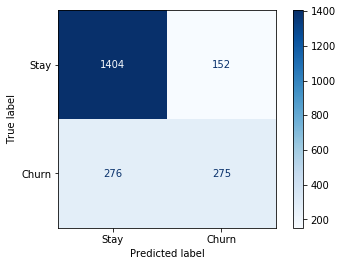

In [9]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(lr_classifier, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

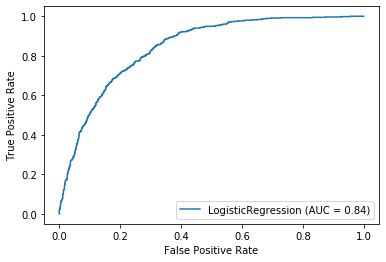

In [10]:
disp = plot_roc_curve(lr_classifier, X_test, y_test)

# 2. Random Forest Classifier

In [11]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
churn = (y_train.value_counts()[1] / y_train.shape)[0]

print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Churning Rate: {churn * 100 :.2f}%")

Staying Rate: 73.42%
Churning Rate: 26.58%


In [12]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1000)
rand_forest.fit(X_train, y_train)

print_score(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.72%
_______________________________________________
Classification Report:	Precision Score: 99.31%
			Recall Score: 99.62%
			F1 score: 99.46%
			Roc curve score: 99.68%
_______________________________________________
Confusion Matrix: 
 [[3599    9]
 [   5 1301]]

Test Result:
Accuracy Score: 78.97%
_______________________________________________
Classification Report:	Precision Score: 62.68%
			Recall Score: 48.46%
			F1 score: 54.66%
			Roc curve score: 69.12%
_______________________________________________
Confusion Matrix: 
 [[1397  159]
 [ 284  267]]



In [13]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=100)

param_grid = {'n_estimators':[550, 600, 650],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"]}

rf_grid_cv = GridSearchCV(rf_clf, param_grid, scoring="f1", n_jobs=-1, verbose=1, cv=3)
# rf_grid_cv.fit(X_train, y_train)

In [14]:
# rf_grid_cv.best_estimator_

In [15]:
rf_clf = RandomForestClassifier(criterion='entropy',
                                max_depth=10,
                                min_samples_leaf=3, 
                                min_samples_split=3,
                                n_estimators=600)

rf_clf.fit(X_train, y_train)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 84.84%
_______________________________________________
Classification Report:	Precision Score: 77.37%
			Recall Score: 60.72%
			F1 score: 68.04%
			Roc curve score: 77.14%
_______________________________________________
Confusion Matrix: 
 [[3376  232]
 [ 513  793]]

Test Result:
Accuracy Score: 80.16%
_______________________________________________
Classification Report:	Precision Score: 65.87%
			Recall Score: 50.09%
			F1 score: 56.91%
			Roc curve score: 70.45%
_______________________________________________
Confusion Matrix: 
 [[1413  143]
 [ 275  276]]



## Cross Validation Score for Random Forest Classifier

In [16]:
scores = cross_val_score(rf_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.57914339 0.56803653 0.57302326]
Random Forest F1_score: 57.34% +/- (0.45)


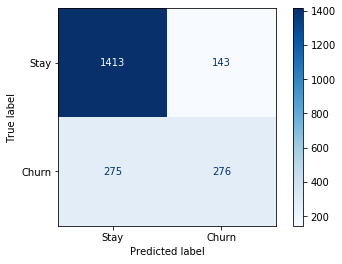

In [17]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

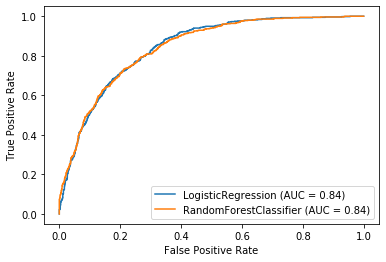

In [18]:
disp = plot_roc_curve(lr_classifier, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)

# 3. Support Vector Machine

In [19]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train_std, y_train)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 82.36%
_______________________________________________
Classification Report:	Precision Score: 73.68%
			Recall Score: 52.30%
			F1 score: 61.17%
			Roc curve score: 72.77%
_______________________________________________
Confusion Matrix: 
 [[3364  244]
 [ 623  683]]

Test Result:
Accuracy Score: 79.64%
_______________________________________________
Classification Report:	Precision Score: 66.05%
			Recall Score: 45.55%
			F1 score: 53.92%
			Roc curve score: 68.63%
_______________________________________________
Confusion Matrix: 
 [[1427  129]
 [ 300  251]]



In [20]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel':['rbf']
}

grid_cv = GridSearchCV(SVC(), param_grid, verbose=1, cv=5, n_jobs=-1)
# grid_cv.fit(X_train_std, y_train)

In [21]:
# grid_cv.best_estimator_

In [22]:
svc = SVC(C=10, gamma=0.01, kernel='rbf')
svc.fit(X_train_std, y_train)

print_score(svc, X_train_std, y_train, X_test_std, y_test, train=True)
print_score(svc, X_train_std, y_train, X_test_std, y_test, train=False)

Train Result:
Accuracy Score: 80.40%
_______________________________________________
Classification Report:	Precision Score: 70.06%
			Recall Score: 45.87%
			F1 score: 55.44%
			Roc curve score: 69.38%
_______________________________________________
Confusion Matrix: 
 [[3352  256]
 [ 707  599]]

Test Result:
Accuracy Score: 79.92%
_______________________________________________
Classification Report:	Precision Score: 67.39%
			Recall Score: 45.01%
			F1 score: 53.97%
			Roc curve score: 68.65%
_______________________________________________
Confusion Matrix: 
 [[1436  120]
 [ 303  248]]



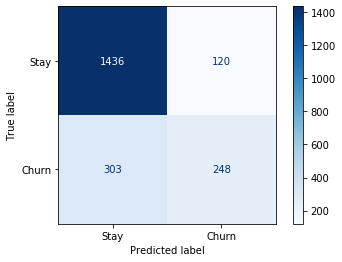

In [23]:
disp = plot_confusion_matrix(svc, X_test_std, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

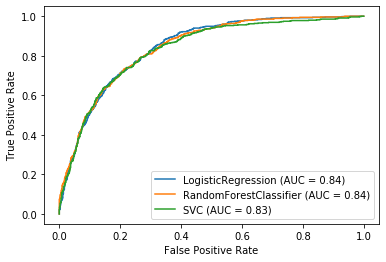

In [24]:
disp = plot_roc_curve(lr_classifier, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)

## Cross Validation Score for Support Vector Machine

In [25]:
scores = cross_val_score(svc, X_std, y, cv=3, scoring='f1')
print(scores)
print(f"Support Vector Machine f1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.57088123 0.53947368 0.53802281]
Support Vector Machine f1_score: 54.95% +/- (1.52)


# 4. XGBoost Classifier

In [26]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.11%
_______________________________________________
Classification Report:	Precision Score: 70.79%
			Recall Score: 55.67%
			F1 score: 62.32%
			Roc curve score: 73.68%
_______________________________________________
Confusion Matrix: 
 [[3308  300]
 [ 579  727]]

Test Result:
Accuracy Score: 79.78%
_______________________________________________
Classification Report:	Precision Score: 64.78%
			Recall Score: 49.73%
			F1 score: 56.26%
			Roc curve score: 70.08%
_______________________________________________
Confusion Matrix: 
 [[1407  149]
 [ 277  274]]



In [27]:
hyperparameter_grid = {'n_estimators': [75, 90, 100, 125], 
                       'learning_rate' : [0.09, 0.1, 0.2], 
                       'base_score' : [0.15],
                       'colsample_bytree':[0.85, 0.95, 1],
                       'colsample_bylevel':[0.85, 0.95, 1],
                       'colsample_bynode':[0.85, 0.95, 1],
                      }

xgb_clf = XGBClassifier()
xgb_cv = GridSearchCV(estimator=xgb_clf, param_grid=hyperparameter_grid, cv=3, 
                      scoring='f1', n_jobs =-1, verbose=1)

# xgb_cv.fit(X_train, y_train)

In [28]:
# xgb_cv.best_estimator_

In [29]:
xgb_clf = XGBClassifier(base_score=0.15, 
                        learning_rate=0.09, 
                        colsample_bylevel=0.85,
                        colsample_bynode=0.85, 
                        colsample_bytree=0.95,
                        n_estimators=100)
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 82.15%
_______________________________________________
Classification Report:	Precision Score: 70.89%
			Recall Score: 55.74%
			F1 score: 62.41%
			Roc curve score: 73.73%
_______________________________________________
Confusion Matrix: 
 [[3309  299]
 [ 578  728]]

Test Result:
Accuracy Score: 79.69%
_______________________________________________
Classification Report:	Precision Score: 64.40%
			Recall Score: 49.91%
			F1 score: 56.24%
			Roc curve score: 70.07%
_______________________________________________
Confusion Matrix: 
 [[1404  152]
 [ 276  275]]



## XGBoost cross validations score

In [30]:
scores = cross_val_score(xgb_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"XGBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.59854015 0.59272405 0.57038391]
XGBoost F1_score: 58.72% +/- (1.21)


<Figure size 864x576 with 0 Axes>

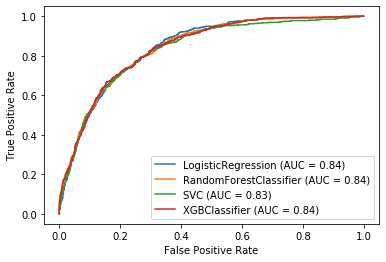

In [31]:
plt.figure(figsize=(12, 8))
disp = plot_roc_curve(lr_classifier, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)
plot_roc_curve(xgb_clf, X_test, y_test, ax=disp.ax_)

# 5. AdaBoost Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.01%
_______________________________________________
Classification Report:	Precision Score: 67.54%
			Recall Score: 54.98%
			F1 score: 60.62%
			Roc curve score: 72.71%
_______________________________________________
Confusion Matrix: 
 [[3263  345]
 [ 588  718]]

Test Result:
Accuracy Score: 79.69%
_______________________________________________
Classification Report:	Precision Score: 63.52%
			Recall Score: 52.45%
			F1 score: 57.46%
			Roc curve score: 70.89%
_______________________________________________
Confusion Matrix: 
 [[1390  166]
 [ 262  289]]



## AdaBoost cross validations score

In [33]:
scores = cross_val_score(ada_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"AdaBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.58969805 0.59062776 0.58802817]
AdaBoost F1_score: 58.95% +/- (0.11)


<Figure size 864x576 with 0 Axes>

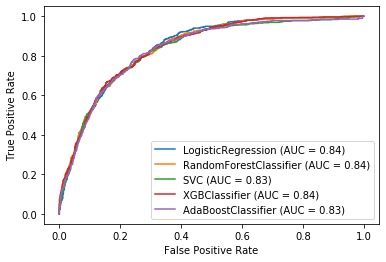

In [34]:
plt.figure(figsize=(12, 8))
disp = plot_roc_curve(lr_classifier, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)
plot_roc_curve(xgb_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(ada_clf, X_test, y_test, ax=disp.ax_)

# 6. Gradient Boosting Machine

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(X_train, y_train)

print_score(gbm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gbm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 83.27%
_______________________________________________
Classification Report:	Precision Score: 73.91%
			Recall Score: 57.27%
			F1 score: 64.54%
			Roc curve score: 74.98%
_______________________________________________
Confusion Matrix: 
 [[3344  264]
 [ 558  748]]

Test Result:
Accuracy Score: 79.88%
_______________________________________________
Classification Report:	Precision Score: 65.45%
			Recall Score: 48.82%
			F1 score: 55.93%
			Roc curve score: 69.85%
_______________________________________________
Confusion Matrix: 
 [[1414  142]
 [ 282  269]]



In [36]:
hyperparameter_grid = {'n_estimators': [90, 100, 120], 
                       'learning_rate' : [0.05, 0.1, 0.5], 
                       'max_depth' : [2, 3, 5, 7, 9],
                       'subsample':[0.85, 0.95, 1]
                      }

gbm_clf = GradientBoostingClassifier()
gbm_cv = GridSearchCV(estimator=gbm_clf, param_grid=hyperparameter_grid, cv=3, 
                      scoring='f1', n_jobs =-1, verbose=1)

# gbm_cv.fit(X_train, y_train)

In [37]:
# gbm_cv.best_estimator_

In [38]:
gbm_clf = GradientBoostingClassifier(learning_rate=0.1, 
                                     n_estimators=120, 
                                     subsample=1, 
                                     max_depth=2)
gbm_clf.fit(X_train, y_train)

print_score(gbm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gbm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.38%
_______________________________________________
Classification Report:	Precision Score: 69.85%
			Recall Score: 52.68%
			F1 score: 60.06%
			Roc curve score: 72.22%
_______________________________________________
Confusion Matrix: 
 [[3311  297]
 [ 618  688]]

Test Result:
Accuracy Score: 79.73%
_______________________________________________
Classification Report:	Precision Score: 65.50%
			Recall Score: 47.55%
			F1 score: 55.10%
			Roc curve score: 69.34%
_______________________________________________
Confusion Matrix: 
 [[1418  138]
 [ 289  262]]



## GBM cross validations score

In [39]:
scores = cross_val_score(gbm_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"GBM F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.57802401 0.58310627 0.5701107 ]
GBM F1_score: 57.71% +/- (0.53)


<Figure size 864x576 with 0 Axes>

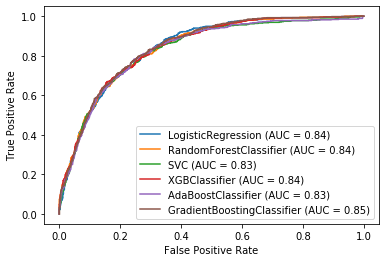

In [40]:
plt.figure(figsize=(12, 8))
disp = plot_roc_curve(lr_classifier, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)
plot_roc_curve(xgb_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(ada_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(gbm_clf, X_test, y_test, ax=disp.ax_)

# 7. LightGBM

In [41]:
import lightgbm

light_gbm_clf = lightgbm.LGBMClassifier()
light_gbm_clf.fit(X_train, y_train)

print_score(light_gbm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(light_gbm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.56%
_______________________________________________
Classification Report:	Precision Score: 81.74%
			Recall Score: 73.35%
			F1 score: 77.32%
			Roc curve score: 83.71%
_______________________________________________
Confusion Matrix: 
 [[3394  214]
 [ 348  958]]

Test Result:
Accuracy Score: 79.12%
_______________________________________________
Classification Report:	Precision Score: 61.35%
			Recall Score: 54.45%
			F1 score: 57.69%
			Roc curve score: 71.15%
_______________________________________________
Confusion Matrix: 
 [[1367  189]
 [ 251  300]]



## Light GBM cross validations score

In [42]:
scores = cross_val_score(light_gbm_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"Light GBM F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.55949137 0.57515204 0.57479601]
Light GBM F1_score: 56.98% +/- (0.73)


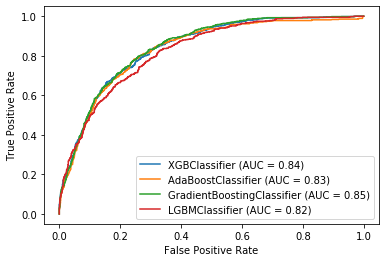

In [43]:
disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(ada_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(gbm_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(light_gbm_clf, X_test, y_test, ax=disp.ax_)

# 8. CatBoost

In [44]:
import catboost

cb_clf = catboost.CatBoostClassifier(verbose=False)
cb_clf.fit(X_train, y_train)

print_score(cb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(cb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.51%
_______________________________________________
Classification Report:	Precision Score: 81.40%
			Recall Score: 68.68%
			F1 score: 74.50%
			Roc curve score: 81.50%
_______________________________________________
Confusion Matrix: 
 [[3403  205]
 [ 409  897]]

Test Result:
Accuracy Score: 78.41%
_______________________________________________
Classification Report:	Precision Score: 60.67%
			Recall Score: 49.55%
			F1 score: 54.55%
			Roc curve score: 69.09%
_______________________________________________
Confusion Matrix: 
 [[1379  177]
 [ 278  273]]



## CatBoost cross validations score

In [45]:
scores = cross_val_score(cb_clf, X, y, cv=3, scoring='f1', verbose=False)
print(scores)
print(f"CatBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

[0.56904541 0.58303887 0.58333333]
CatBoost F1_score: 57.85% +/- (0.67)


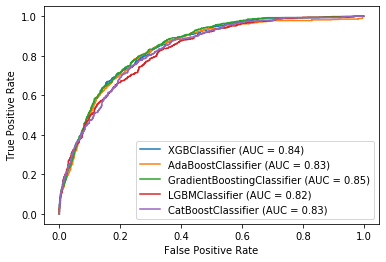

In [46]:
disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(ada_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(gbm_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(light_gbm_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(cb_clf, X_test, y_test, ax=disp.ax_)

# Feature Importance

In [47]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

Text(0.5, 1.0, 'Feature Importance according to XGBoost')

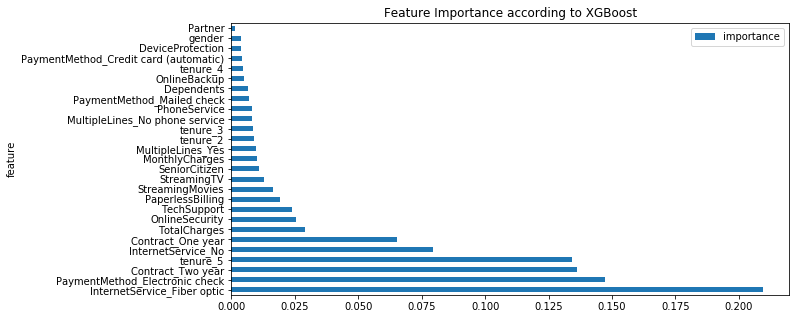

In [48]:
df = feature_imp(data.drop('Churn', axis=1), xgb_clf)
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 5))
plt.title('Feature Importance according to XGBoost')

Text(0.5, 1.0, 'Feature Importance according to Random Forest')

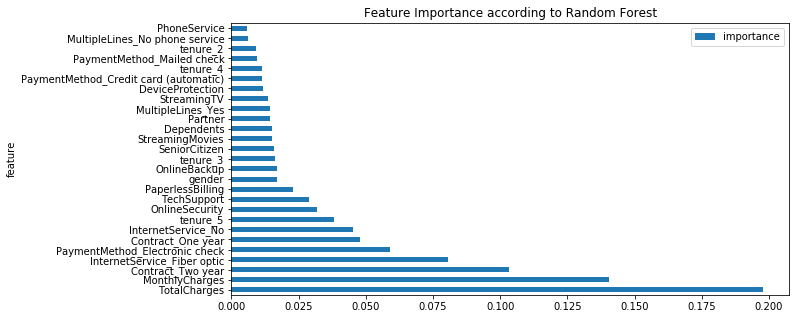

In [49]:
df = feature_imp(data.drop('Churn', axis=1), rf_clf)
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 5))
plt.title('Feature Importance according to Random Forest')

In [50]:
from sklearn.feature_selection import RFE

rfe = RFE(lr_classifier, n_features_to_select=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l1',
                                 random_state=None, solver='liblinear',
                                 tol=0.0001, verbose=0, warm_start=False),
    n_features_to_select=1, step=1, verbose=0)

In [51]:
rfe_ranking = dict(zip(rfe.ranking_.tolist(), X_train.columns.tolist()))
print(rfe_ranking)

{23: 'gender', 14: 'SeniorCitizen', 24: 'Partner', 19: 'Dependents', 10: 'PhoneService', 9: 'OnlineSecurity', 18: 'OnlineBackup', 22: 'DeviceProtection', 13: 'TechSupport', 15: 'StreamingTV', 12: 'StreamingMovies', 17: 'PaperlessBilling', 25: 'MonthlyCharges', 26: 'TotalCharges', 27: 'MultipleLines_No phone service', 16: 'MultipleLines_Yes', 3: 'InternetService_Fiber optic', 4: 'InternetService_No', 2: 'Contract_One year', 1: 'Contract_Two year', 20: 'PaymentMethod_Credit card (automatic)', 11: 'PaymentMethod_Electronic check', 21: 'PaymentMethod_Mailed check', 8: 'tenure_2', 7: 'tenure_3', 6: 'tenure_4', 5: 'tenure_5'}
